# YOLO Object Recognition


YOLO (You Only Look Once) is an object detection algorithm that leverages features learned by a deep convolutional neural network to detect objects in images.

Specifically, YOLO has been trained on the COCO (Common Objects in Context) dataset, which encompasses a diverse range of objects.

The COCO dataset includes 80 labels, covering various categories such as people, bicycles, cars, trucks, airplanes, stop signs, fire hydrants, animals (cats, dogs, birds, horses, cows, sheep), and kitchen and dining objects (wine glasses, cups, forks, knives, spoons), among many others.

YOLO's ability to simultaneously detect multiple object instances in a single pass makes it a powerful and efficient object detection model.





#Importing Libraries

In [43]:
import cv2 #load our images
import matplotlib.pyplot as plt #plots the  image

#Object Detection
Use object_detection.py file, which defines functions related to object detection, including calculating Intersection over Union (IoU) between bounding boxes, performing Non-Maximal Suppression (NMS), and visualizing the detected objects on an image.

In [44]:
import sys
sys.path.append("/content/object_detection.py")
from object_detection import *


#DarkNet

Use the 'Darknet.py' file for implementation of the Darknet neural network architecture using PyTorch. Darknet is commonly used for training and deploying object detection models, and it's popular in the context of the YOLO (You Only Look Once) object detection algorithm.

In [45]:
import sys
sys.path.append("/content/darknet.py")
from darknet import *


# Setting Up The Neural Network

In [29]:
# Download YOLOv3 configuration file
!wget https://github.com/pjreddie/darknet/blob/master/cfg/yolov3.cfg?raw=true -O yolov3.cfg

--2023-11-17 10:56:01--  https://github.com/pjreddie/darknet/blob/master/cfg/yolov3.cfg?raw=true
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/pjreddie/darknet/raw/master/cfg/yolov3.cfg [following]
--2023-11-17 10:56:01--  https://github.com/pjreddie/darknet/raw/master/cfg/yolov3.cfg
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg [following]
--2023-11-17 10:56:01--  https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK


In [30]:
# Set the location and name of the cfg file that contains the network architecture
cfg_file = '/content/yolov3.cfg'

In [31]:
# Download YOLOv3 weights
!wget https://pjreddie.com/media/files/yolov3.weights




--2023-11-17 10:56:34--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  42.9MB/s    in 6.4s    

2023-11-17 10:56:41 (37.2 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [33]:
# Set the location and name of the pre-trained weights file that contains the pre-trained weights
weight_file = '/content/yolov3.weights'


In [32]:
# Download COCO names file
!wget https://github.com/pjreddie/darknet/blob/master/data/coco.names?raw=true -O coco.names





--2023-11-17 10:57:51--  https://github.com/pjreddie/darknet/blob/master/data/coco.names?raw=true
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/pjreddie/darknet/raw/master/data/coco.names [following]
--2023-11-17 10:57:51--  https://github.com/pjreddie/darknet/raw/master/data/coco.names
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names [following]
--2023-11-17 10:57:51--  https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 20

In [34]:
# Set the location and name of COCO object classes file that has the list of the 80 object classes that the weights were trained to detect.
namesfile = '/content/coco.names'


In [35]:
# Load the network architecture
m = Darknet(cfg_file)

In [36]:
# Load the pre-trained weights
m.load_weights(weight_file)

In [37]:
# Load the COCO object classes
class_names = load_class_names(namesfile)

In [ ]:
#The structure of the neural network used by YOLOv3 consists mainly of convolutional layers, with some shortcut connections and upsample layers.

# Print the neural network used in YOLOv3
m.print_network()



# Loading and Resizing Images

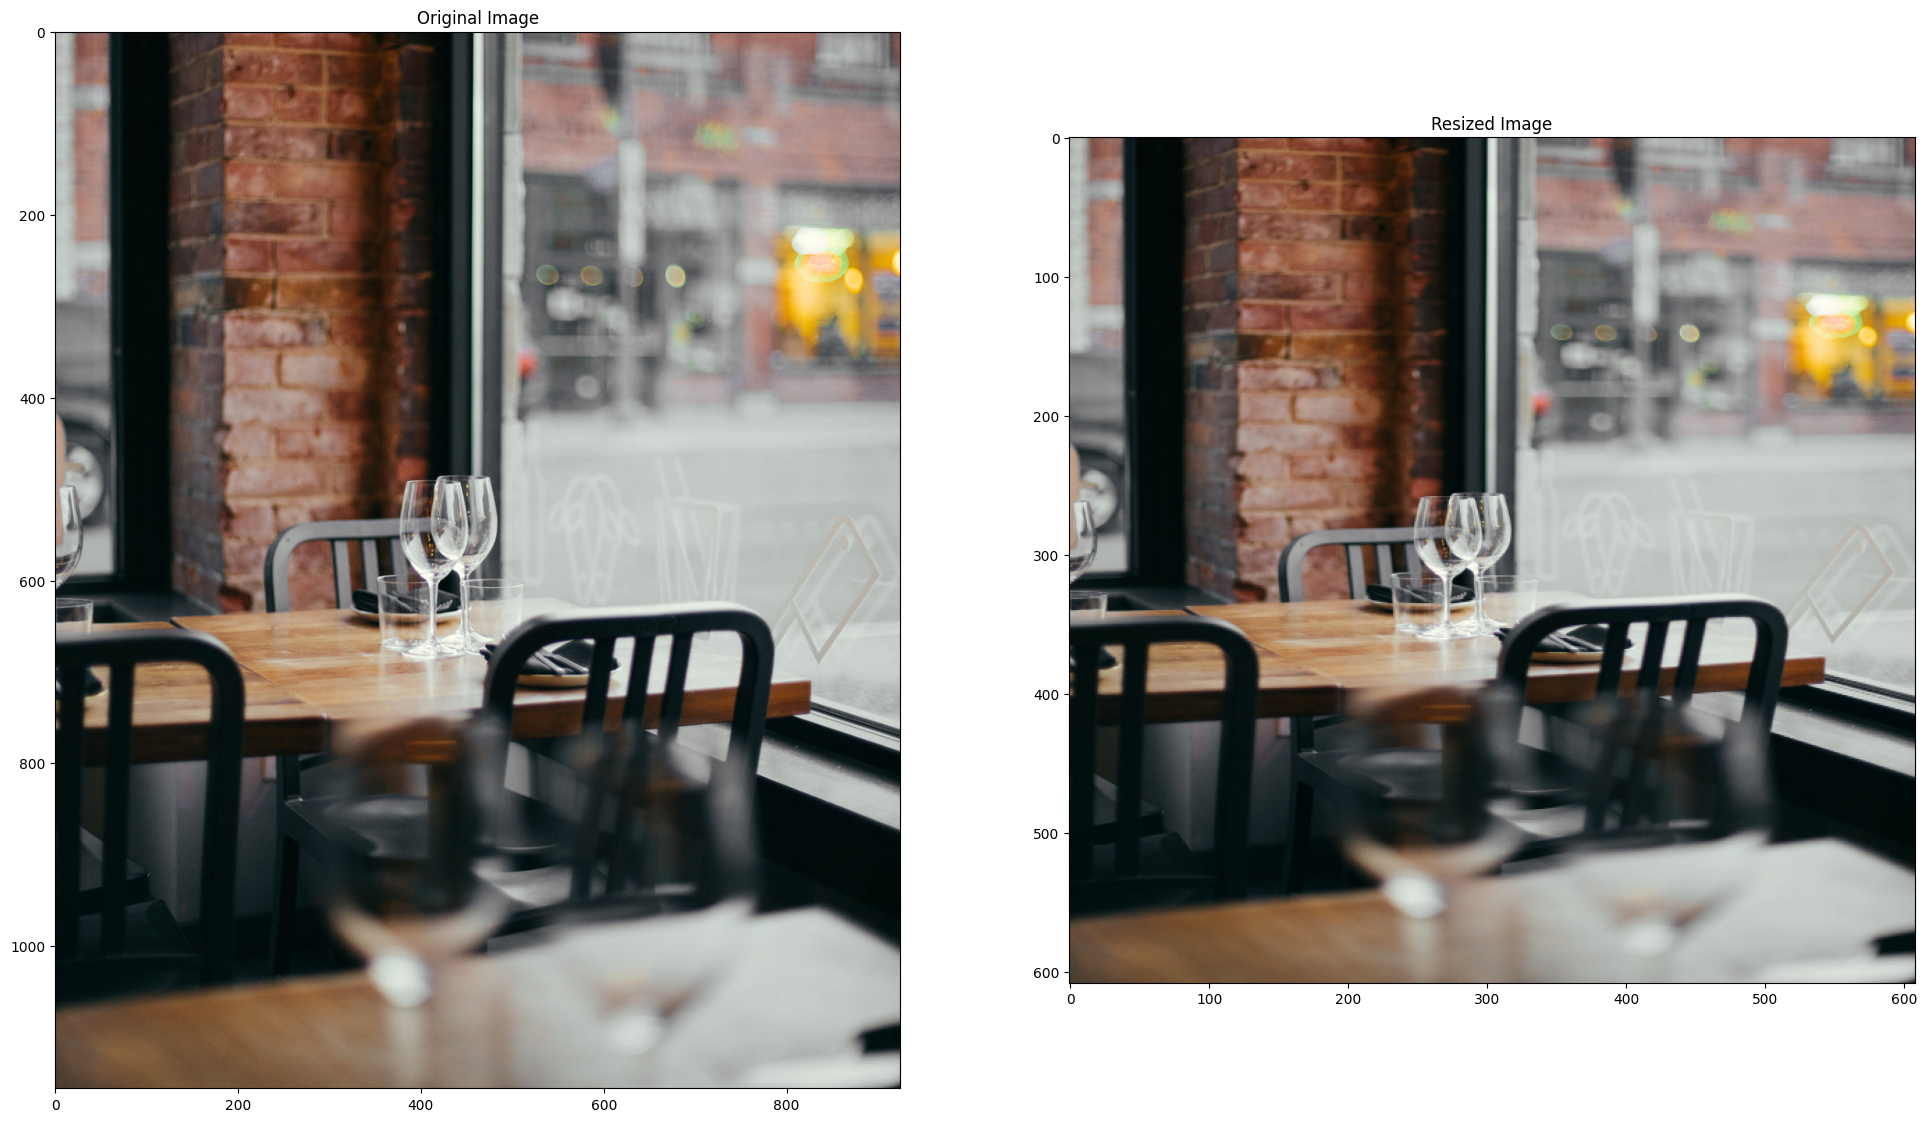

In [57]:
# Set the default figure size
plt.rcParams['figure.figsize'] = [24.0, 14.0]

# load our images using OpenCV's cv2.imread() function.
img = cv2.imread('/content/img1.jpg')


# #Since, this function loads images as BGR we will convert our images to RGB
original_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# We resize the image to the input width and height of the first layer of the network ie 416 x 416 x 3.
resized_image = cv2.resize(original_image, (m.width, m.height))

# Display the images
plt.subplot(121)
plt.title('Original Image')
plt.imshow(original_image)
plt.subplot(122)
plt.title('Resized Image')
plt.imshow(resized_image)
plt.show()

# Setting the Non-Maximal Suppression (NMS) Threshold
 YOLO uses **Non-Maximal Suppression (NMS)** to only keep the best bounding box. The first step in NMS is to remove all the predicted bounding boxes that have a detection probability that is less than a given NMS threshold.  

In [58]:
# Set the NMS threshold
nms_thresh = 0.8

# Setting the Intersection Over Union (IOU) Threshold

After removing all the predicted bounding boxes that have a low detection probability, the second step in NMS, is to select the bounding boxes with the highest detection probability and eliminate all the bounding boxes whose **Intersection Over Union (IOU)** value is higher than a given IOU threshold.

In [59]:
# Set the IOU threshold
iou_thresh = 0.6

# Object Detection



It took 2.468 seconds to detect the objects in the image.

Number of Objects Detected: 4 

Objects Found and Confidence Level:

1. wine glass: 1.000000
2. wine glass: 1.000000
3. diningtable: 0.711302
4. cup: 0.934468


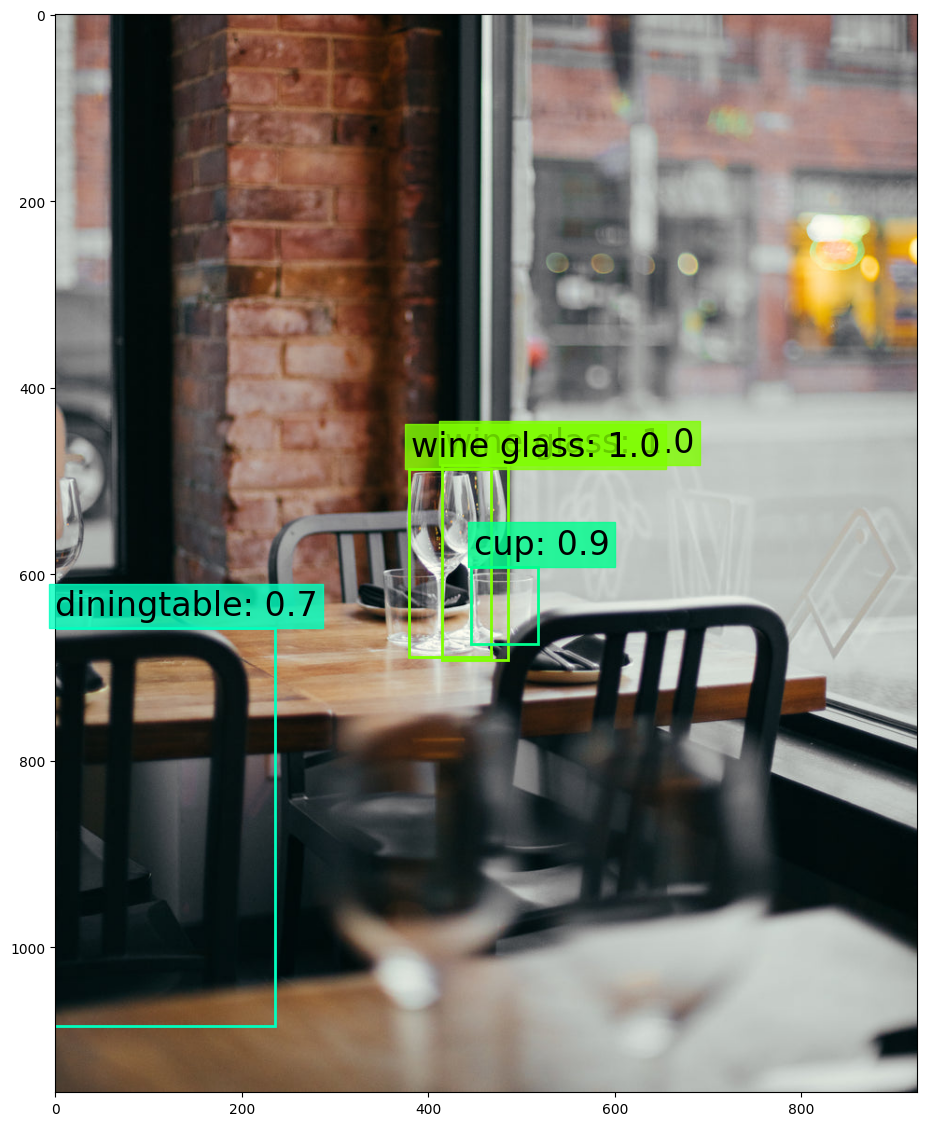

In [60]:
# Detect objects in the image
boxes = detect_objects(m, resized_image, iou_thresh, nms_thresh)

# Print the objects found and the confidence level
print_objects(boxes, class_names)

#Plot the image with bounding boxes and corresponding object class labels
plot_boxes(original_image, boxes, class_names, plot_labels = True)